In [159]:
import random
import math
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import copy
from statistics import mean
import matplotlib.pyplot as plt

In [160]:
Operators = ["+", '-', '*', '/',"^", "sin" , "cos"]
Values = [0 , 1, 2, 3, 4, 5, 6, 7, 8, 9]
variable = ['x']
First_population = 60
Best_choise_num = 5
Other_choise_num = 2
Iteration = 50
Mutation_rate = 0 #From 100%
Mutation_count = 0 #Per gen
Max_tree_depth = 2
copy_Mutation_rate = 10
copy_Mutation_count = 2
max_node = 2 ** Max_tree_depth

In [161]:
def function(x):
    # return 2 * (x**2)  + 1
    # return 3*(x/2)
    # return 2 * np.sin(x) + 5
    return x**3
    # return np.sin(x) + np.cos(2*x)

In [162]:
X_train = np.random.randint(1, 200, size=(100, 1))
y_train = function(X_train[:,0])
len(X_train)
y_train


array([  27000, 1953125,   46656,  166375,  571787, 1124864,  205379,
       6331625, 2628072, 3723875, 2985984, 2248091, 3241792,   91125,
       5832000, 4019679, 1771561, 6128487, 3307949, 2248091, 6859000,
          2744, 1601613, 2628072,     216,   79507,  300763, 1404928,
       1442897, 2197000, 5929741, 7762392, 2744000,   85184,    1728,
          2744,  912673, 3241792, 1092727,    2744,  343000,  250047,
        343000,  551368, 6128487, 2460375, 1259712, 2460375,   39304,
        238328,   13824,  250047,    1331,   13824,   10648,  551368,
       6128487,   32768, 3048625,   35937, 1092727, 1367631, 4173281,
       3796416, 5451776, 2048383,  300763, 2628072, 2197000,  132651,
       2571353, 1442897, 7414875,     125,  704969, 1728000,  148877,
       3869893, 1601613,  493039,  456533, 6751269,    3375, 4657463,
         39304, 2803221, 6859000, 4913000,  681472, 4096000,   39304,
        110592, 1906624,  912673,  175616, 2685619, 4019679, 2197000,
       2460375, 4330

In [163]:
class Node() :
    def __init__(self , operator , children) :
        self.operator = operator
        self.children = children
        self.isLeaf= False
        self.value = 0


In [164]:
class Tree () :
    def __init__(self , max_depth = 6) :
        self.max_depth = max_depth
        self.root = None
    def createFromRoot (self , node):
        self.root = node

    def returnRoot (self):
        node = self.root
        return node

    def create (self):
        self.root  = self.grow()
    
    def printTree (self , node = None):
        if (node == None):
            print(self.to_math_string(self.root))
        else:
            print(self.to_math_string(node))
        

    def grow (self , depth = 0 ):

        temp_op = random.choice(Operators)
        temp_rand = random.randint(0 , 10)

        if (depth == self.max_depth or temp_rand > 7):
            if (temp_op == "sin" or temp_op == "cos"):
                randomOp = random.randint(0,10)
                if (randomOp >= 5):
                    child = random.choice(Values)
                else:
                    child = "x"
                temp_node = Node (operator=temp_op, children=[child])
                temp_node.isLeaf = True
                return temp_node
            else :
                randomOp = random.randint(0,10)
                if (randomOp >= 5):
                    child1 = random.choice(Values)
                else:
                    child1 = "x"
                
                randomOp = random.randint(0,10)
                if (randomOp >= 5):
                    child2 = random.choice(Values)
                else:
                    child2 = "x"
                temp_node = Node (operator= temp_op , children=[child1,child2])
                temp_node.isLeaf = True
                return temp_node
        
        else:
            if (temp_op == "sin" or temp_op == "cos"):
                child = self.grow ( depth= depth + 1 )
                temp_node = Node (operator= temp_op , children=[child])
                return temp_node
            else :
                left_node  = self.grow ( depth= depth + 1 )
                right_node = self.grow ( depth= depth + 1 )
                temp_node = Node (operator= temp_op , children=[left_node,right_node])
                return temp_node
    
    def to_math_string(self , node):
        if isinstance ( node , Node):
            if node.isLeaf:
                if len(node.children) == 1:
                    return f"{node.operator}({node.children[0]})"
                else:
                    return f"({node.children[0]} {node.operator} {node.children[1]})"
            else:
                if len(node.children) == 1:
                    return f"{node.operator}({self.to_math_string(node.children[0])})"
                else:
                    return f"({self.to_math_string(node.children[0])} {node.operator} {self.to_math_string(node.children[1])})"
            
    
    def calculate (self , val):
        return self.calculator ( self.root , val)


    def calculator (self , node , val):
        if isinstance (node , Node):
            if node.isLeaf:
                if len(node.children) == 1:
                    if (node.children[0] == "x"):
                        node.value = self.SinCosOp (node , val)

                    else :
                        node.value = self.SinCosOp (node , node.children[0])
                    # return node.value
                else :
                    if (node.children[0] == "x" and node.children[1] == "x"):
                        node.value = self.OtherOp (node , val , val)
                    elif (node.children[0] == "x" and node.children[1] != "x"):
                        node.value = self.OtherOp (node , val , node.children[1])
                    elif (node.children[0] != "x" and node.children[1] == "x"):
                        node.value = self.OtherOp (node , node.children[0], val)
                    else:
                        node.value = self.OtherOp (node , node.children[0] , node.children[1])
                    # return node.value
            else:
                if len(node.children) == 1:
                    temp_val = self.calculator(node.children[0] , val)
                    node.value = self.SinCosOp (node , temp_val)
                else :
                    temp_val1 = self.calculator(node.children[0], val)
                    temp_val2 = self.calculator(node.children[1], val)
                    node.value = self.OtherOp (node , temp_val1 , temp_val2)
            return node.value
            


    def SinCosOp (self , node , val):
        if (node.operator == "sin"):
            return np.sin(val)
        if (node.operator == "cos"):
            return np.cos(val)
        
    def OtherOp(self, node, val1, val2, flag=False):
        if flag:
            return
        if node.operator == "+":
            result = val1 + val2
            if result > 10000:
                flag = True
                return 10000
            elif result < -10000:
                flag = True
                return -10000
            else:
                return result
        elif node.operator == "-":
            result = val1 - val2
            if result > 10000:
                flag = True
                return 10000
            elif result < -10000:
                flag = True
                return -10000
            else:
                return result
        elif node.operator == "*":
            result = val1 * val2
            if result > 10000:
                flag = True
                return 10000
            elif result < -10000:
                flag = True
                return -10000
            else:
                return result
        elif node.operator == "/":
            if val2 == 0:
                flag = True
                return 1
            # Convert val1 and val2 to float to avoid overflow errors
            result = float(val1) / float(val2)
            if result > 10000:
                flag = True
                return 10000
            elif result < -10000:
                flag = True
                return -10000
            else:
                return result
        elif node.operator == "^":
            if val1 == 0 and val2 < 0:
                return 1
            else:
                if val2 == 0:
                    return 1
                x = 1
                i = 1
                while not flag and i <= val2:
                    x = x * val1
                    i += 1
                    if x > 10000 or x < -10000:
                        flag = True
                        return 1000
                return x



    def TreeToList (self):
        root = self.root
        nodes = []
        self.traverse(root , nodes)
        return nodes
    
    def traverse (self , node , nodes):
        nodes.append(node)
        if (node.isLeaf == False):
            for i in range (len(node.children)):
                self.traverse (node.children[i] , nodes)

    def ReplaceNode (self , selfNode , replaceNode):
        
        
        root = self.root
        self.root = self.traverseToFind (root , selfNode , replaceNode)
        # self.printTree(self.root)

    def traverseToFind (self ,node , selfNode , replaceNode):
        if (node == selfNode ):
                node = copy.deepcopy(replaceNode)
                return node
        else :
            if (node.isLeaf == False):
                for i in range (len(node.children)):
                    node.children[i]= self.traverseToFind(node.children[i] , selfNode , replaceNode)

            return node


In [165]:
def Create_tree ():
    my_tree = Tree(random.randint(1 , Max_tree_depth))
    my_tree.create()
    return my_tree


In [166]:
treeList = []
for i in range (First_population):
    treeList.append(Create_tree())
    treeList[i].printTree()
    # treeList[i].calculate(1)


mseTree = []
for tree in treeList :
    valueList = []
    for i in range(len(X_train)) :
        temp = tree.calculate(X_train[i][0])
        valueList.append(temp)
    # print(np.array(valueList))
    mse = mean_squared_error(y_train,valueList)
    mseTree.append (mse)
mseTree = np.array(mseTree)
print (mseTree)

cos((9 / x))
cos(((1 ^ 1) * (4 - x)))
((6 + 6) / (1 ^ 7))
(cos((x * 5)) * (sin(8) + (x ^ 0)))
(((x / x) + (x + x)) - (x + 0))
cos((5 - 7))
(sin(x) * cos(2))
(x / 4)
((4 * x) * sin(x))
((cos(5) / (9 + 2)) * (4 ^ 6))
(x / x)
sin(cos(4))
cos(cos(3))
cos((0 + x))
(x * 7)
(0 ^ 2)
(3 * x)
cos(((x - x) - (x ^ 9)))
(cos(4) ^ (7 ^ x))
cos((0 - 8))
((cos(9) + (x - x)) ^ ((0 - x) + (9 - x)))
(x / 9)
(x - 6)
(sin(sin(x)) + ((x - x) ^ (7 + 7)))
sin(6)
(x * 0)
(8 - 0)
cos(((7 - 8) / (7 / x)))
(x - x)
(cos(x) ^ sin(2))
(((x * 5) - (2 * x)) + (4 - 8))
(x + 7)
(x ^ 9)
((x / 9) + (x + 1))
(cos(8) ^ (x * 2))
(x - 9)
((3 - 4) - (x + 2))
((x * x) * (4 / x))
(((1 + 3) ^ sin(9)) / (cos(6) ^ (9 ^ 1)))
cos(5)
(((9 - 3) - cos(4)) ^ cos((4 + 9)))
((x * 4) - (3 + x))
sin(((x - 9) ^ (x + x)))
((sin(9) - (x ^ 0)) + ((x / x) - sin(x)))
(((9 / 9) / cos(x)) ^ ((1 / 7) - (5 - 7)))
((x ^ x) + sin(4))
((1 ^ x) * (x * x))
(((6 / 0) - (x / x)) / ((x - 1) * (x / 0)))
(x ^ 0)
(sin(sin(8)) ^ (1 + x))
sin(9)
(((1 * x) + sin(x)

In [167]:
avg = []
n = 0
for i in range (Iteration):

    bestTrees = []
    otherTrees = []

    #Find the best MSEs
    bestTreesIndex = mseTree.argsort()[:Best_choise_num]
    other_idx = np.arange(len(mseTree))[~np.isin(np.arange(len(mseTree)), bestTreesIndex)]
    
    #Create new gen from best trees and others
    for j in range (len(bestTreesIndex)):
        bestTrees.append(treeList[bestTreesIndex[j]])
    # for j in range (len(other_idx)):
    #     otherTrees.append(treeList[other_idx[j]])
    # random_elements = random.sample(otherTrees, Other_choise_num)
    # for element in random_elements :
    #      bestTrees.append(element)

    # Mutation
    # if (len(avg) > 10):
    #     if (all(avg[-5] == item for item in avg[-4:]) and avg[-1] > 10):
    #         Mutation_rate *= 2
    #         Mutation_count *=2
    #     elif (all(avg[-10] == item for item in avg[-9:] ) and avg[-1] > 10) :
    #         Mutation_rate *= 5
    #         Mutation_count *= 5
    #     else :
    #         Mutation_rate = copy_Mutation_rate
    #         Mutation_count = copy_Mutation_count

    if (len(avg) > 2):
        if avg[-1] == 0 :
            break
        tempDiff = abs(avg[-2] - avg[-1])
        print ("temp diff : " , tempDiff)
        if (tempDiff == 0):
            tempScale = 200
        else:
            tempScale = avg[-1] / tempDiff
        # if ( avg[-1]<1):
        #     n=0
        #     Mutation_rate = 0
        #     Mutation_count = 0
        if (tempScale > 100):
            # print (avg[-1])
            # print ("&&&&&&&")
            print (" the n is :" , n)
            n +=1
            Mutation_rate = copy_Mutation_rate * n
            Mutation_count = copy_Mutation_count * n
        else :
            n=0
            Mutation_rate = copy_Mutation_rate
            Mutation_count = copy_Mutation_count


    tempRate = random.randint(1,100)
    if (tempRate <= Mutation_rate):
        for j in range (Mutation_count):
            tempTree = Create_tree()
            bestTrees.append(tempTree)
            print ("!!!!!!!!")
            print (i)
            tempTree.printTree()



    treeList =[]
    for j in range (len(bestTrees)):
        treeList.append(bestTrees[j])
        for k in range (j+1 , len(bestTrees)):
            flag = True
            
            for i in range (10):
                temp1 = copy.deepcopy(bestTrees[j])
                temp2 = copy.deepcopy(bestTrees[k])

                nodes1= temp1.TreeToList()
                nodes2 = temp2.TreeToList()

                # print (str(len(nodes1)) + " || " + str(len(nodes2)))

                select1 = random.choice (nodes1)
                select2 = random.choice (nodes2)

                # print ("Before change")
                # temp1.printTree()
                # temp2.printTree()

                # print ("Selected Nodes:")
                # temp1.printTree(select1)
                # temp2.printTree(select2)

                temp1.ReplaceNode (select1 , select2)
                temp2.ReplaceNode (select2 , select1)

                list1= temp1.TreeToList()
                list2= temp2.TreeToList()

                if (len(list1) <= max_node and len(list2) <= max_node):
                    break
                # print ("After change")
                # temp1.printTree()
                # temp2.printTree()
                # print (str(len(list1)) + " || " + str(len(list2)))

            # print ("---------------------")


            treeList.append(temp1)
            treeList.append(temp2)
                
                # print ("Child created!")
                # print ("-----------------------------------------------------------")


    mseTree=[]
    # print ("All childs created!")
    for tree in treeList :
        # tree.printTree()
        valueList = []
        for j in range(len(X_train)) :
            temp = tree.calculate(X_train[j][0])
            valueList.append(temp)
        valueList = np.array(valueList)
        mse = mean_squared_error(y_train,valueList)
        mseTree.append (abs(mse))
    sorted_list = sorted(mseTree)
    lowest_five = sorted_list[:Best_choise_num]
    # avg.append(mean (lowest_five))
    avg.append(round((sum(lowest_five) / len(lowest_five)) , 2))
    mseTree = np.array(mseTree)
    # print (mseTree)

sorted_list = sorted(mseTree)
lowest_five = sorted_list[:Best_choise_num]
bestTreesIndex = mseTree.argsort()[:Best_choise_num]
print ("------------------------------------------")
for j in range (len(bestTreesIndex)):
        treeList[bestTreesIndex[j]].printTree()

# print ("------------------------------------------")
# print (mseTree)

# np.array(avg)
avg


temp diff :  0.0
 the n is : 0
temp diff :  0.0
 the n is : 1
temp diff :  0.0
 the n is : 2
!!!!!!!!
5
(x + x)
!!!!!!!!
5
cos((x / x))
!!!!!!!!
5
((8 / 3) / sin(x))
!!!!!!!!
5
sin((0 - 1))
!!!!!!!!
5
(9 / x)
!!!!!!!!
5
(sin(cos(x)) + ((8 / x) + sin(x)))
temp diff :  4.880000000121072
 the n is : 3
temp diff :  0.0
 the n is : 4
temp diff :  4.879999999888241
 the n is : 5
!!!!!!!!
8
((4 + 2) * (x / x))
!!!!!!!!
8
(cos((9 * 5)) / ((3 * 4) / (9 ^ 2)))
!!!!!!!!
8
sin((2 - x))
!!!!!!!!
8
sin(sin((x - x)))
!!!!!!!!
8
sin(x)
!!!!!!!!
8
(((x - 4) - (x - x)) * (sin(x) + cos(x)))
!!!!!!!!
8
(sin(x) - cos(x))
!!!!!!!!
8
((cos(0) * (1 ^ x)) / ((2 / 8) - (x - 6)))
!!!!!!!!
8
cos((9 - 8))
!!!!!!!!
8
((x * x) * (5 - x))
!!!!!!!!
8
cos(4)
!!!!!!!!
8
(4 ^ 8)
temp diff :  94.43000000016764
 the n is : 6
temp diff :  157.80999999982305
 the n is : 7
!!!!!!!!
10
(((9 ^ 3) / (3 / x)) ^ (sin(8) ^ (x - 5)))
!!!!!!!!
10
((x - x) / sin((6 ^ 1)))
!!!!!!!!
10
((x + x) + (9 ^ 8))
!!!!!!!!
10
(((2 - x) - (7 ^ x)

[2769642.06,
 1717196.58,
 1717196.58,
 1717196.58,
 1717196.58,
 1717191.7,
 1717191.7,
 1717186.82,
 1717092.39,
 1716934.58,
 1716782.18,
 1716782.18,
 1716782.18,
 1716782.18,
 1716661.21,
 1716580.57,
 1716580.57,
 1716580.57,
 1150356.92,
 467709.7,
 467709.7,
 467709.7,
 467709.7,
 467709.7,
 467709.7,
 467709.7,
 467709.7,
 467709.7,
 393648.64,
 245526.51,
 97404.38,
 97404.38,
 97404.38,
 97404.38,
 97404.38,
 97404.38,
 97404.38,
 97404.38,
 97404.38,
 97404.38,
 97404.38,
 97404.38,
 97404.38,
 97404.38,
 97404.38,
 97404.38,
 97404.38,
 97404.38,
 97404.38,
 97404.38]

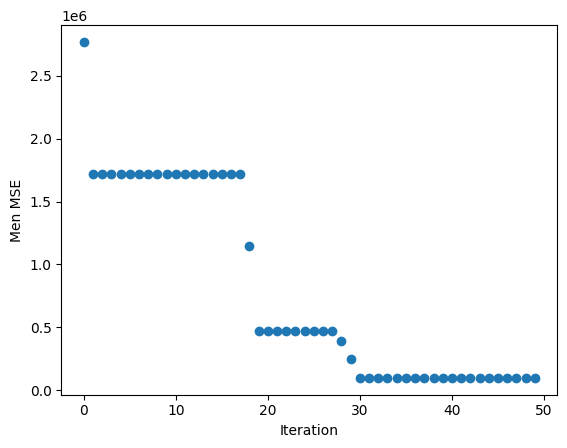

In [168]:
plt.scatter(range(len(avg)), avg)
plt.xlabel('Iteration')
plt.ylabel('Men MSE')

plt.show()